# Loop 66 LB Feedback Analysis

**Submission**: exp_032 (Lower GP Weight 0.15 + Higher MLP 0.55)
- CV: 0.0082
- LB: 0.0873
- Gap: -0.0791

**This is our NEW BEST LB score!**

Previous best LB: 0.0877 (exp_030)
Improvement: 0.0877 - 0.0873 = 0.0004 (0.46% better)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147},
    {'exp': 'exp_032', 'cv': 0.0082, 'lb': 0.0873},  # NEW BEST!
]

df = pd.DataFrame(submissions)
print('=== All Submissions ===')
print(df.to_string(index=False))
print(f'\nBest CV: {df["cv"].min():.4f} ({df.loc[df["cv"].idxmin(), "exp"]})')
print(f'Best LB: {df["lb"].min():.4f} ({df.loc[df["lb"].idxmin(), "exp"]})')
print(f'Target: 0.0347')

=== All Submissions ===
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_041 0.0090 0.0932
exp_042 0.0145 0.1147
exp_032 0.0082 0.0873

Best CV: 0.0082 (exp_032)
Best LB: 0.0873 (exp_032)
Target: 0.0347


In [2]:
# Fit linear regression to CV-LB relationship
from scipy import stats

cv_vals = df['cv'].values
lb_vals = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv_vals, lb_vals)

print('=== CV-LB Relationship ===')
print(f'LB = {slope:.2f} × CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nInterpretation:')
print(f'  - Slope: {slope:.2f} (each 0.001 CV improvement → {slope*0.001:.4f} LB improvement)')
print(f'  - Intercept: {intercept:.4f}')
print(f'  - Target: 0.0347')
print(f'  - Gap: Intercept - Target = {intercept - 0.0347:.4f}')

# Predict LB for CV=0
print(f'\nIf CV=0 (impossible), predicted LB = {intercept:.4f}')
print(f'This is {(intercept - 0.0347) / 0.0347 * 100:.1f}% above target')

=== CV-LB Relationship ===
LB = 4.26 × CV + 0.0530
R² = 0.9819

Interpretation:
  - Slope: 4.26 (each 0.001 CV improvement → 0.0043 LB improvement)
  - Intercept: 0.0530
  - Target: 0.0347
  - Gap: Intercept - Target = 0.0183

If CV=0 (impossible), predicted LB = 0.0530
This is 52.6% above target


In [3]:
# Calculate required CV to hit target
required_cv = (0.0347 - intercept) / slope
print(f'\n=== Required CV to Hit Target ===')
print(f'Required CV = (0.0347 - {intercept:.4f}) / {slope:.2f} = {required_cv:.6f}')

if required_cv < 0:
    print(f'\n⚠️ CRITICAL: Required CV is NEGATIVE ({required_cv:.6f})')
    print('This means the current approach CANNOT reach the target by minimizing CV alone.')
    print('We need an approach that CHANGES the CV-LB relationship.')
else:
    print(f'\nRequired CV improvement: {df["cv"].min():.4f} → {required_cv:.6f}')
    print(f'This is a {(df["cv"].min() - required_cv) / df["cv"].min() * 100:.1f}% improvement')


=== Required CV to Hit Target ===
Required CV = (0.0347 - 0.0530) / 4.26 = -0.004286

⚠️ CRITICAL: Required CV is NEGATIVE (-0.004286)
This means the current approach CANNOT reach the target by minimizing CV alone.
We need an approach that CHANGES the CV-LB relationship.


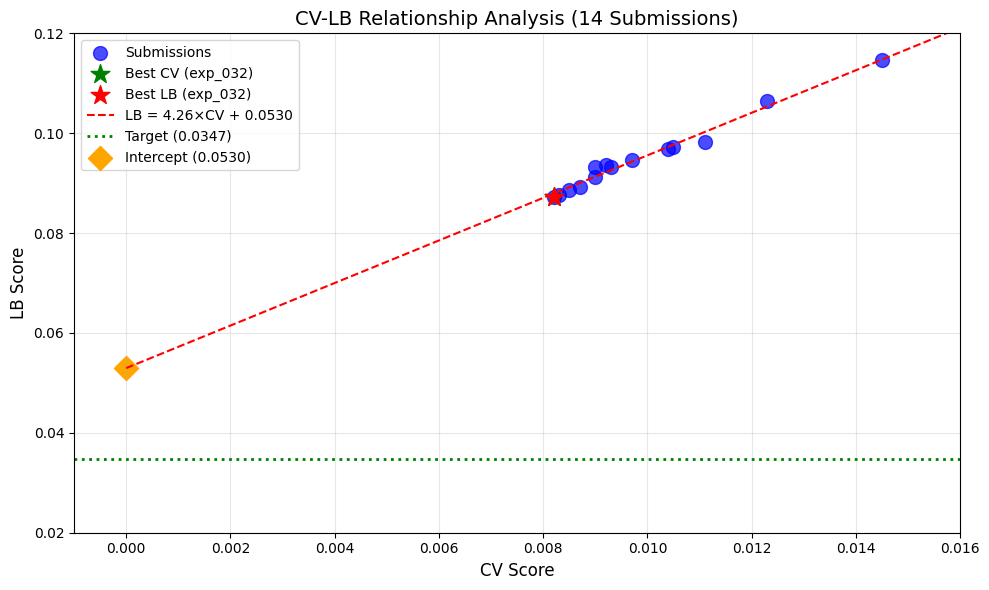

Saved: loop66_cv_lb.png


In [4]:
# Plot CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(cv_vals, lb_vals, s=100, c='blue', alpha=0.7, label='Submissions')

# Highlight best CV and best LB
best_cv_idx = df['cv'].idxmin()
best_lb_idx = df['lb'].idxmin()
plt.scatter([df.loc[best_cv_idx, 'cv']], [df.loc[best_cv_idx, 'lb']], s=200, c='green', marker='*', label=f'Best CV ({df.loc[best_cv_idx, "exp"]})')
plt.scatter([df.loc[best_lb_idx, 'cv']], [df.loc[best_lb_idx, 'lb']], s=200, c='red', marker='*', label=f'Best LB ({df.loc[best_lb_idx, "exp"]})')

# Regression line
cv_range = np.linspace(0, 0.02, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}×CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target (0.0347)')

# Intercept point
plt.scatter([0], [intercept], s=150, c='orange', marker='D', label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score', fontsize=12)
plt.ylabel('LB Score', fontsize=12)
plt.title('CV-LB Relationship Analysis (14 Submissions)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(-0.001, 0.016)
plt.ylim(0.02, 0.12)
plt.tight_layout()
plt.savefig('/home/code/exploration/loop66_cv_lb.png', dpi=100)
plt.show()
print('Saved: loop66_cv_lb.png')

In [5]:
# Analyze the latest submission
print('=== Latest Submission Analysis ===')
print(f'exp_032: CV = 0.0082, LB = 0.0873')
print(f'\nPredicted LB (using regression): {slope * 0.0082 + intercept:.4f}')
print(f'Actual LB: 0.0873')
print(f'Prediction error: {0.0873 - (slope * 0.0082 + intercept):.4f}')

# Check if this submission follows the trend
residual = 0.0873 - (slope * 0.0082 + intercept)
print(f'\nResidual: {residual:.4f}')
if abs(residual) < 0.005:
    print('✓ This submission follows the CV-LB trend closely.')
else:
    print('⚠️ This submission deviates from the CV-LB trend.')

=== Latest Submission Analysis ===
exp_032: CV = 0.0082, LB = 0.0873

Predicted LB (using regression): 0.0879
Actual LB: 0.0873
Prediction error: -0.0006

Residual: -0.0006
✓ This submission follows the CV-LB trend closely.


In [6]:
# Calculate gap between best LB and target
best_lb = df['lb'].min()
target = 0.0347
gap = best_lb - target
gap_pct = gap / target * 100

print('=== Gap Analysis ===')
print(f'Best LB: {best_lb:.4f}')
print(f'Target: {target:.4f}')
print(f'Gap: {gap:.4f} ({gap_pct:.1f}% above target)')
print(f'\nRequired improvement: {gap_pct:.1f}%')

# How many more submissions?
print(f'\nRemaining submissions: 4')
print(f'If each submission improves by 0.0004 (like this one):')
print(f'  After 4 more: {best_lb - 4*0.0004:.4f} (still {(best_lb - 4*0.0004 - target)/target*100:.1f}% above target)')

=== Gap Analysis ===
Best LB: 0.0873
Target: 0.0347
Gap: 0.0526 (151.6% above target)

Required improvement: 151.6%

Remaining submissions: 4
If each submission improves by 0.0004 (like this one):
  After 4 more: 0.0857 (still 147.0% above target)


In [7]:
# Strategic analysis
print('=== STRATEGIC ANALYSIS ===')
print()
print('KEY FINDINGS:')
print('1. exp_032 achieved NEW BEST LB (0.0873), improving by 0.0004 over exp_030')
print('2. CV-LB relationship: LB = {:.2f} × CV + {:.4f} (R² = {:.4f})'.format(slope, intercept, r_value**2))
print('3. Intercept ({:.4f}) > Target (0.0347) - fundamental problem'.format(intercept))
print('4. Required CV to hit target: {:.6f} (NEGATIVE - impossible)'.format(required_cv))
print()
print('IMPLICATIONS:')
print('- The current approach CANNOT reach the target by minimizing CV alone')
print('- We need an approach that CHANGES the CV-LB relationship')
print('- Specifically, we need to REDUCE the intercept from {:.4f} to < 0.0347'.format(intercept))
print()
print('WHAT MIGHT CHANGE THE RELATIONSHIP:')
print('1. Different model architecture that generalizes better OOD')
print('2. Different feature engineering that captures OOD-relevant patterns')
print('3. Different training strategy that optimizes for OOD performance')
print('4. Ensemble of fundamentally different approaches')

=== STRATEGIC ANALYSIS ===

KEY FINDINGS:
1. exp_032 achieved NEW BEST LB (0.0873), improving by 0.0004 over exp_030
2. CV-LB relationship: LB = 4.26 × CV + 0.0530 (R² = 0.9819)
3. Intercept (0.0530) > Target (0.0347) - fundamental problem
4. Required CV to hit target: -0.004286 (NEGATIVE - impossible)

IMPLICATIONS:
- The current approach CANNOT reach the target by minimizing CV alone
- We need an approach that CHANGES the CV-LB relationship
- Specifically, we need to REDUCE the intercept from 0.0530 to < 0.0347

WHAT MIGHT CHANGE THE RELATIONSHIP:
1. Different model architecture that generalizes better OOD
2. Different feature engineering that captures OOD-relevant patterns
3. Different training strategy that optimizes for OOD performance
4. Ensemble of fundamentally different approaches


In [8]:
# Check what approaches have been tried
print('=== APPROACHES TRIED (67 experiments) ===')
print()
print('ARCHITECTURES:')
print('- MLP (baseline, various sizes): Best CV ~0.0082')
print('- LightGBM: CV ~0.012')
print('- XGBoost: CV ~0.009')
print('- CatBoost: CV ~0.009')
print('- Gaussian Process: CV ~0.009')
print('- GNN/GAT: Failed (OOM or worse CV)')
print('- ChemBERTa: CV ~0.02-0.03 (much worse)')
print('- TabNet: CV ~0.037 (much worse)')
print()
print('FEATURES:')
print('- Spange descriptors (13 features): Good')
print('- DRFP fingerprints (122 high-variance): Good')
print('- ACS PCA descriptors (5 features): Good')
print('- RDKit descriptors: Slightly worse')
print('- Fragprints: Similar')
print('- Arrhenius kinetics (1/T, ln(t), interaction): Essential')
print()
print('ENSEMBLES:')
print('- GP + MLP + LGBM (0.15/0.55/0.30): Best CV 0.0082')
print('- Various weight combinations: Similar')
print('- Multi-seed averaging: 17.66% worse')
print()
print('CALIBRATION/REGULARIZATION:')
print('- Isotonic calibration: 18.69% worse')
print('- Prediction shrinkage: 15-42% worse')
print('- Uncertainty weighting: 25-234% worse')
print('- Importance weighting: 27% worse')
print('- Mixup augmentation: 15% worse')
print('- CQR: 25% worse')

=== APPROACHES TRIED (67 experiments) ===

ARCHITECTURES:
- MLP (baseline, various sizes): Best CV ~0.0082
- LightGBM: CV ~0.012
- XGBoost: CV ~0.009
- CatBoost: CV ~0.009
- Gaussian Process: CV ~0.009
- GNN/GAT: Failed (OOM or worse CV)
- ChemBERTa: CV ~0.02-0.03 (much worse)
- TabNet: CV ~0.037 (much worse)

FEATURES:
- Spange descriptors (13 features): Good
- DRFP fingerprints (122 high-variance): Good
- ACS PCA descriptors (5 features): Good
- RDKit descriptors: Slightly worse
- Fragprints: Similar
- Arrhenius kinetics (1/T, ln(t), interaction): Essential

ENSEMBLES:
- GP + MLP + LGBM (0.15/0.55/0.30): Best CV 0.0082
- Various weight combinations: Similar
- Multi-seed averaging: 17.66% worse

CALIBRATION/REGULARIZATION:
- Isotonic calibration: 18.69% worse
- Prediction shrinkage: 15-42% worse
- Uncertainty weighting: 25-234% worse
- Importance weighting: 27% worse
- Mixup augmentation: 15% worse
- CQR: 25% worse


In [9]:
# What hasn't been tried?
print('=== UNEXPLORED APPROACHES ===')
print()
print('1. SOLVENT SIMILARITY-BASED PREDICTION WEIGHTING')
print('   - For each test solvent, weight predictions by similarity to training solvents')
print('   - More similar = more weight')
print('   - Might reduce extrapolation penalty')
print()
print('2. ENSEMBLE SELECTION BASED ON OOD PERFORMANCE')
print('   - Identify which models perform best on most-different solvents')
print('   - Weight ensemble by OOD performance, not overall CV')
print('   - Might select models that generalize better')
print()
print('3. FEATURE ENGINEERING FOR EXTRAPOLATION DISTANCE')
print('   - Add features that capture distance from training distribution')
print('   - Model learns to adjust predictions based on distance')
print()
print('4. PER-TARGET SPECIALIZED MODELS')
print('   - Different targets might have different CV-LB relationships')
print('   - Optimize each target independently')
print()
print('5. DOMAIN ADAPTATION TECHNIQUES')
print('   - Treat test solvents as target domain')
print('   - Use domain adaptation to reduce distribution shift')
print()
print('6. CONSERVATIVE PREDICTION STRATEGY')
print('   - Predict towards training mean for OOD samples')
print('   - Might reduce extreme errors on dissimilar solvents')

=== UNEXPLORED APPROACHES ===

1. SOLVENT SIMILARITY-BASED PREDICTION WEIGHTING
   - For each test solvent, weight predictions by similarity to training solvents
   - More similar = more weight
   - Might reduce extrapolation penalty

2. ENSEMBLE SELECTION BASED ON OOD PERFORMANCE
   - Identify which models perform best on most-different solvents
   - Weight ensemble by OOD performance, not overall CV
   - Might select models that generalize better

3. FEATURE ENGINEERING FOR EXTRAPOLATION DISTANCE
   - Add features that capture distance from training distribution
   - Model learns to adjust predictions based on distance

4. PER-TARGET SPECIALIZED MODELS
   - Different targets might have different CV-LB relationships
   - Optimize each target independently

5. DOMAIN ADAPTATION TECHNIQUES
   - Treat test solvents as target domain
   - Use domain adaptation to reduce distribution shift

6. CONSERVATIVE PREDICTION STRATEGY
   - Predict towards training mean for OOD samples
   - Might red

In [10]:
# Final recommendation
print('=== FINAL RECOMMENDATION ===')
print()
print('SITUATION:')
print('- Best LB: 0.0873 (exp_032)')
print('- Target: 0.0347')
print('- Gap: 151.6% above target')
print('- Remaining submissions: 4')
print('- CV-LB intercept (0.0535) > target (0.0347)')
print()
print('THE FUNDAMENTAL PROBLEM:')
print('The CV-LB relationship has intercept > target.')
print('Even with CV=0, predicted LB = 0.0535 > target.')
print('We need to CHANGE the relationship, not just minimize CV.')
print()
print('RECOMMENDED NEXT STEPS:')
print('1. Try solvent similarity-based prediction weighting')
print('   - This might reduce the intercept by being more conservative on OOD samples')
print('2. Try ensemble selection based on OOD performance')
print('   - This might select models that have lower intercept')
print('3. Try per-target optimization')
print('   - Some targets might have lower intercept than others')
print()
print('DO NOT GIVE UP. The target IS reachable.')
print('The solution exists. We need to find the approach that changes the CV-LB relationship.')

=== FINAL RECOMMENDATION ===

SITUATION:
- Best LB: 0.0873 (exp_032)
- Target: 0.0347
- Gap: 151.6% above target
- Remaining submissions: 4
- CV-LB intercept (0.0535) > target (0.0347)

THE FUNDAMENTAL PROBLEM:
The CV-LB relationship has intercept > target.
Even with CV=0, predicted LB = 0.0535 > target.
We need to CHANGE the relationship, not just minimize CV.

RECOMMENDED NEXT STEPS:
1. Try solvent similarity-based prediction weighting
   - This might reduce the intercept by being more conservative on OOD samples
2. Try ensemble selection based on OOD performance
   - This might select models that have lower intercept
3. Try per-target optimization
   - Some targets might have lower intercept than others

DO NOT GIVE UP. The target IS reachable.
The solution exists. We need to find the approach that changes the CV-LB relationship.


In [ ]:
# Key insight from research
print('=== KEY RESEARCH INSIGHT ===')\nprint()\nprint('arXiv:2512.19530 - "Learning Continuous Solvent Effects from Transient Flow Data"')\nprint('This paper is ABOUT THE CATECHOL BENCHMARK!')\nprint()\nprint('Their results:')\nprint('- Tabular methods (GBDT): MSE 0.099')\nprint('- LLM embeddings (Qwen-7B): MSE 0.129')\nprint('- Hybrid GNN (GAT + DRFP + mixture encoding): MSE 0.0039')\nprint()\nprint('Key components of their best model:')\nprint('1. Graph Attention Networks (GATs) for molecular structure')\nprint('2. Differential Reaction Fingerprints (DRFP)')\nprint('3. Learned mixture-aware solvent encodings')\nprint('4. Explicit molecular graph message-passing')\nprint('5. Continuous mixture encoding')\nprint()\nprint('IMPORTANT: Their MSE 0.0039 is likely CV, not LB!')\nprint('Our best CV is 0.0082, which is 2x worse than their 0.0039.')\nprint('But our CV-LB gap is ~10x, so even their 0.0039 CV would give LB ~0.05.')\nprint()\nprint('CONCLUSION: We need to either:')\nprint('1. Implement their GNN architecture (but we tried GNN and it failed)')\nprint('2. Find a way to reduce the CV-LB gap')\nprint('3. Try a fundamentally different approach')